In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import manifold
import pickle as pk
from sklearn import linear_model
import time
from skl_groups.features import Features
from skl_groups.summaries import BagOfWords
from sklearn.cluster import KMeans
from sklearn.cross_validation import KFold
from mpl_toolkits.axes_grid1 import *
from sklearn.manifold import LocallyLinearEmbedding
import seaborn as sns
import scipy
from skl_groups.kernels import PairwisePicker, Symmetrize, RBFize, ProjectPSD


%matplotlib inline

/home/jenna/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
# load kernel file
def loadSimilarities(fn):
    """
    Load the previously saved similarity matrix from a .npz file

    Inputs:
    - fn: directory/filename (minus extension) to load the file from

    Returns:
    - loadedSims: similarity matrix
    """
    loader = np.load(fn+".npz")
    print "Similarities loaded!"
    return loader['similarities']

fn = './simulatedData/divergence-2000'
kl = loadSimilarities(fn)

Similarities loaded!


In [6]:
kl.shape

(2000, 2000)

In [7]:
print kl.min(), np.median(kl.flatten()), kl.max()

0.0 0.040319 2.33494


In [14]:
sym = Symmetrize()
kl_sym = sym.fit_transform(kl)

In [19]:
assert (kl_sym == kl_sym.T).all()

In [28]:
rbf = RBFize(gamma=.5, scale_by_median=False)
kl_rbf = rbf.fit_transform(kl_sym)

In [29]:
print kl_rbf.min(), kl_rbf.max()

0.251081 1.0


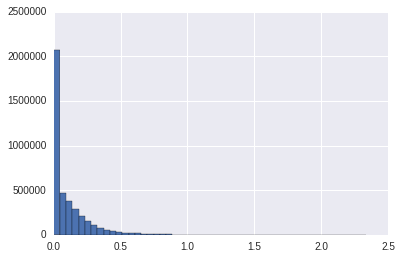

In [23]:
_ = plt.hist(kl.flatten(),50)

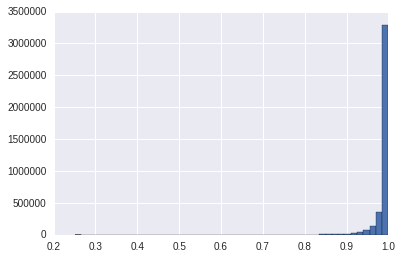

In [30]:
_ = plt.hist(kl_rbf.flatten(),50)

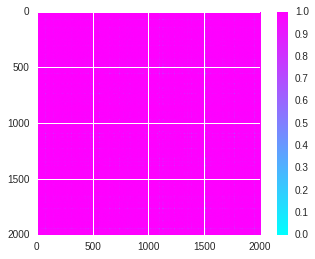

In [34]:
plt.imshow(kl_rbf, vmin=0, vmax=1.0, cmap='cool')
plt.colorbar()

In [35]:
def loadSimFeats(fn):
    """
    Load a previously saved simulated subject from a .npz file.

    Inputs:
    - fn: filename/directory to load from (extensionless)

    Returns:
    - features: single patient's features/nodes
    - ids: subject ids
    - y: the label (number of abnormal nodes)
    """
    with open(fn+"-feats.data.p", "rb") as f:
        loader = pk.load(f)
    f.close()
    print "Simluated patient features and metadata loaded!"
    return loader['ids'], np.asarray(loader['y']), loader['features']

patientsFN = "./simulatedData/simulatedSubjects"
loadedIds, numAbnormalNodes, loadedSubjs = loadSimFeats(patientsFN)

Simluated patient features and metadata loaded!


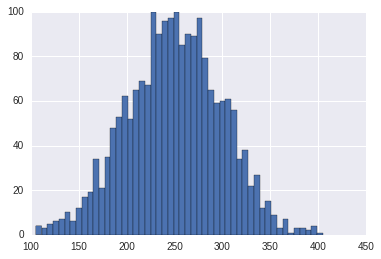

In [37]:
_ = plt.hist(numAbnormalNodes[:2000],50)

7909


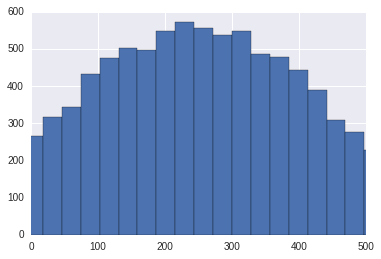

In [60]:
mu = 250
sigma = 200
N = 10000
y = np.random.normal(mu, sigma, N)
_ = plt.hist(y,50)
plt.xlim(0, 500)
print ((y >= 0) & (y < 500)).sum()

In [6]:
import h5py

f = h5py.File("/home/jenna/Downloads/26176B.hdf5")

sid = f['/sid'].value
subjList = list(f['/subjList'].value)
sampleWeights = f['/sample_weights'].value
predicted = f['/predicted'].value

f.close()

print "SID: ", sid
print "subjList: ", len(subjList)
print "sampleWeights: ", sampleWeights.shape
print "predicted: ", predicted.shape

SID:  26176B
subjList:  7292
sampleWeights:  (6253,)
predicted:  (6253,)
